In [59]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\aimbe\Downloads\Karpov\lesson_3_data_1_.csv', encoding = 'Windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df = user_df.rename(columns = {'tc':'user_id', 'art_sp':'brand_info'})

In [6]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [7]:
def brand_split(brand_data):
    return brand_data.split(' ')[-1]

In [8]:
user_df['brand_name'] = user_df.brand_info.apply(brand_split) #using formula

In [9]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
#lambda

In [10]:
user_purchases = user_df\
    .groupby('user_id', as_index = False)\
    .agg({'brand_name':'count'})\
    .rename(columns = {'brand_name':'count_purchases'})\
    .query('count_purchases >= 5') #segmenting

In [11]:
user_purchases.describe()

,user_id,count_purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [12]:
user_purchases.head()

,user_id,count_purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [28]:
lovely_brand_purchases_df = user_df.groupby(['user_id','brand_name'], as_index = False)\
    .agg({'brand_info':'count'})\
    .sort_values(['user_id', 'brand_info'], ascending = [False, False])\
    .groupby('user_id')\
    .head(1)\
    .rename(columns = {'brand_name':'lovely_brand', 'brand_info':'lovely_brand_purchases'}) 
#searching for lovely brands

In [48]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [35]:
users_unique_brands = user_df.groupby('user_id', as_index = False)\
    .agg({'brand_name' : pd.Series.nunique})\
    .rename(columns = {'brand_name' : 'unique_brands'})

In [49]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [40]:
x = pd.Series([1, 2, 3]) #pandas series repetition

In [46]:
loyalty_df = user_purchases\
    .merge(users_unique_brands, on = 'user_id', how = 'inner')\
    .merge(lovely_brand_purchases_df, on = 'user_id', how = 'inner') #merging

In [52]:
loyalty_df.head()

,user_id,count_purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [51]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [54]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases/loyalty_df.count_purchases

In [57]:
loyalty_df.head()

,user_id,count_purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


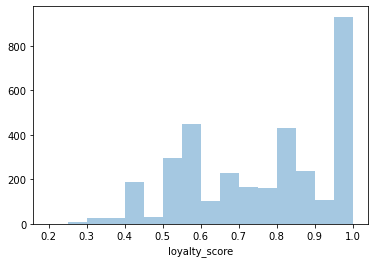

In [64]:
ax = sns.distplot(loyalty_df.loyalty_score, kde = False) #exploring by visualisation

In [70]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index = False)\
    .agg({'loyalty_score':'median', 'user_id':'count'})

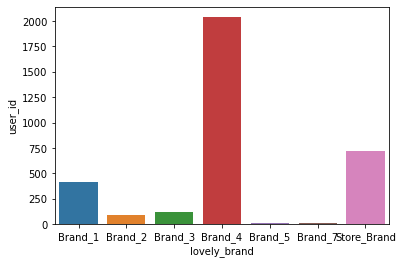

In [73]:
ax = sns.barplot(x = 'lovely_brand', y = 'user_id',data = brands_loyalty)